

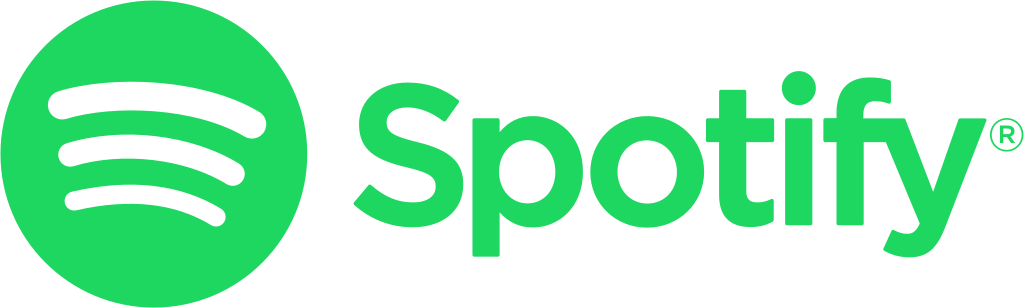

## DATA

In [1]:
# Libraries used

import matplotlib.pyplot as plt # for visualization
import numpy as np # for numerical computing
import pandas as pd # for data manipulation and analysis
import pycountry # for accesing ISO databases of countries and languages
import os # library that provides functions to interact with the operating system
import requests # is used for making HTTP requests.
import seaborn as sns # for visualization
import spotipy #is a lightweight Python library for the Spotify Web API.
from spotipy.oauth2 import SpotifyClientCredentials

import spotipy_funtions as sf #funtions created to get data from spotify

### **GETTING DATA FROM SPOTIFY:**

#### 1. Requesting access to the Spotify API:

In [2]:
# Spotify client items:
client_id = "ef77e31c5d4049818901058b81bd56a3"
client_secret = "c773be9c070044e2ad067db5f86b62cb"
uri = "http://localhost:8080"

In [3]:
# Endpoint
token_url = "https://accounts.spotify.com/api/token"

# Parameters
data = {
    "grant_type": "client_credentials",
    "client_id": client_id,
    "client_secret": client_secret
}

# Make the POST request to obtain the access token
response = requests.post(token_url, data=data)

# Check if the request was successful
if response.status_code == 200:
    # Extract the access token from the response body
    access_token = response.json()["access_token"]
    print("Access token obtained:", access_token)
else:
    print("Failed to obtain access token. Status code:", response.status_code)

Access token obtained: BQCu15Dhlnx7B3bGMMhZD0P8H1Bam9X9k3osPk8LVjF1wORuUcmDCoKS6vEswtZXW_gX9K0iO29a4aXE5RYYhp6juNDsyejXfmCLKM1fX3in-6eBS88


From this moment on, I'm using the ``Spotipy`` library, which provides a Python interface for the Spotify Web API, facilitating interaction with the data and features provided by Spotify. The library allows access to a wide range of functionalities and comes with comprehensive documentation and usage examples that make learning and effective use easier.

In [4]:
# Initialize the Spotify authentication client
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

# Create a Spotify object, for  requesting
sp = spotipy.Spotify(auth_manager=auth_manager)

#### 2. List of countries:

``PyCountry`` is a useful tool for working with data related to countries in Python applications, providing a convenient way to access standardized information about countries, their codes, and other associated details."

In [5]:
# Obtain the data of countries
countries_data = list(pycountry.countries)

In [6]:
# Expample  for France:
print(f"Name: {countries_data[75].name} \nCode: {countries_data[75].alpha_2}")

Name: France 
Code: FR


In [7]:
# List of countries and list of codes
countries_names = [country.name for country in countries_data]
countries_codes = [country.alpha_2 for country in countries_data]

#### 3. Playlist_ids dataframe:

I create my ``get_playlist_id`` to obtain  playlists

Then, i do the same for obtain every playlist from Top 50, in every country.

In [9]:
# Create an empty list to store the data
playlist_list = []
counter = 0

# Iterate over each country
for name in countries_names:
    playlist_name = f"Top 50: {name}"

    # Get the playlist ID using your function
    playlist_id = sf.get_playlist_id(playlist_name)

    if playlist_id:
        # Add the playlist data to the list
        playlist_list.append({
            'country': name,
            'playlist_id': playlist_id
        })
    else:
        # Print a message if no playlists were found for the country
        counter += 1
        print("No playlist found with the name '{}' for country '{}'".format(playlist_name, name))
        print(f"Number of not found countries: {counter}")
        print("*" * 20)


Playlist 'Top 50: Afghanistan' not found.
No playlist found with the name 'Top 50: Afghanistan' for country 'Afghanistan'
Number of not found countries: 1
********************
Playlist 'Top 50: Åland Islands' not found.
No playlist found with the name 'Top 50: Åland Islands' for country 'Åland Islands'
Number of not found countries: 2
********************
Playlist 'Top 50: Albania' not found.
No playlist found with the name 'Top 50: Albania' for country 'Albania'
Number of not found countries: 3
********************
Playlist 'Top 50: United Arab Emirates' not found.
No playlist found with the name 'Top 50: United Arab Emirates' for country 'United Arab Emirates'
Number of not found countries: 4
********************
Playlist 'Top 50: French Southern Territories' not found.
No playlist found with the name 'Top 50: French Southern Territories' for country 'French Southern Territories'
Number of not found countries: 5
********************
Playlist 'Top 50: Antigua and Barbuda' not found.
N

It seem that for some countries there are not playlist called "Top 50". 

``53 not found when collected data. ``


Every time I run this code cell, the number of countries not found varies... this may be because the playlist I'm searching for is being updated.

In [10]:
playlist_list[60:70]

[{'country': 'Falkland Islands (Malvinas)', 'playlist_id': '37i9dQZF1E8MczzkoYW5Qy'}, {'country': 'France', 'playlist_id': '37i9dQZEVXbIPWwFssbupI'}, {'country': 'Faroe Islands', 'playlist_id': '37i9dQZF1EIdQubHkpewmd'}, {'country': 'Gabon', 'playlist_id': '37i9dQZF1DWSHg3zCMrBDf'}, {'country': 'United Kingdom', 'playlist_id': '37i9dQZEVXbLnolsZ8PSNw'}, {'country': 'Georgia', 'playlist_id': '37i9dQZF1E8LYntJja4fdR'}, {'country': 'Ghana', 'playlist_id': '37i9dQZF1DWSHg3zCMrBDf'}, {'country': 'Guinea', 'playlist_id': '37i9dQZF1E8Qrv1qELSGkr'}, {'country': 'Gambia', 'playlist_id': '37i9dQZF1EIUmG0p1KJ3K2'}, {'country': 'Guinea-Bissau', 'playlist_id': '37i9dQZF1E4BiViTsz2stf'}]


In [12]:
# Example for France:
print(playlist_list[61]['country'])

france_pl_id = playlist_list[61]['playlist_id']

# Printing the playlist ID for France
print("Playlist ID for France:", france_pl_id)

France
Playlist ID for France: 37i9dQZEVXbIPWwFssbupI


Top 50: France --> playlist_id

<img src="./img/france_playlist_id.png" alt="France web Scrapping" width="1000" height="300">

I create the ``get_playlist_info`` for extract info.

In [13]:
# Example for France:
france_info = sf.get_playlist_info(france_pl_id)
france_info

{'collaborative': False,
 'description': 'Your daily update of the most played tracks right now - France.',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZEVXbIPWwFssbupI'},
 'followers': {'href': None, 'total': 844522},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbIPWwFssbupI?additional_types=track',
 'id': '37i9dQZEVXbIPWwFssbupI',
 'images': [{'height': None,
   'url': 'https://charts-images.scdn.co/assets/locale_en/regional/daily/region_fr_large.jpg',
   'width': None}],
 'name': 'Top 50 - France',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'NzY1NjQ3NDAwLDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDY1NmU=',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbIPWwFssbupI/tracks?o

I will need a funtion to take out the information --> followers and total songs. ``get_playlist_data``

In [14]:
# Example for France:
france_info_processed = sf.get_playlist_data(france_pl_id)
france_info_processed

followers      844522
total_songs        50
dtype: int64

In [15]:
# Create a DataFrame from the list of playlist data
playlist_data = []

# Iterate over playlist_list and extract required information
for playlist in playlist_list:
    country = playlist['country']
    playlist_id = playlist['playlist_id']
    info = sf.get_playlist_data(playlist_id)

    playlist_data.append({'country': country,
                          'playlist_id': playlist_id,
                          'followers': info['followers'],
                          'total_songs': info['total_songs']})

# Create a DataFrame from the list of playlist data
playlist_df = pd.DataFrame(playlist_data)
playlist_df.sample(5)

,country,playlist_id,followers,total_songs
77,Haiti,37i9dQZF1DXbl4lbUfCVSx,31315,40
73,Guatemala,37i9dQZEVXbLy5tBFyQvd4,81402,50
35,Congo,37i9dQZF1DX8d57cbyhqPM,37005,75
151,Singapore,37i9dQZEVXbK4gjvS1FjPY,133698,50
53,Eritrea,37i9dQZF1EIfiXPCoBVtZZ,0,50
52,Egypt,37i9dQZEVXbLn7RQmT5Xv2,29079,50
128,Norfolk Island,37i9dQZF1E8PXy9LfWKjbb,2350,50
155,El Salvador,37i9dQZEVXbLxoIml4MYkT,55351,50
148,Rwanda,37i9dQZF1DWZgbYyehYtQC,2243,60
104,Lesotho,37i9dQZF1E8N3YS4zE7ouT,11,50


In [16]:
# Save changes:
#playlist_df.to_csv("./data/playlist_df.csv")

In [8]:
# Import dataframe when collected:
#playlist_df=pd.read_csv("./data/playlist_df.csv")

#### 4. Artists dataframe:

I create a funtion to get data from a playlist id and then convert it in a pandas dataframe. ``create_playlist_df``

In [17]:
# Example for France:
france_df = sf.create_playlist_df(playlist_df,"France")
france_df.head(5)

,country,artist,album,song_name,release_date,duration_ms,popularity,track_id
0,France,Benson Boone,Beautiful Things,Beautiful Things,2024-01-18,180304,100,6tNQ70jh4OwmPGpYy6R2o9
1,France,Zola,Frères Ennemis,Temps en temps,2024-02-09,153649,70,01zsTmucc72th13AWj9HPf
2,France,Jungeli,Petit génie,Petit génie,2023-08-04,217259,81,1eldTykrnkEBLX41bk5eMw
3,France,Franglish,Prime,Position,2024-02-15,141226,76,3Zw66L4FvI9YUUx17OReRD
4,France,Gazo,LA MELO EST GANGX,MAMI WATA,2023-12-01,233240,79,6yqwxY8qifBBhyryjZutxk
5,France,Beyoncé,COWBOY CARTER,TEXAS HOLD 'EM,2024-03-29,233456,83,7wLShogStyDeZvL0a6daN5
6,France,Pierre Garnier,Ceux qu'on était,Ceux qu'on était,2024-02-07,174106,79,5Pzh42xn3oAXHh4U7tVHMr
7,France,Artemas,i like the way you kiss me,i like the way you kiss me,2024-03-19,142514,93,2GxrNKugF82CnoRFbQfzPf
8,France,Dadju,HÉRITAGE,I love you,2024-02-16,237866,69,6jDe94y1dbLDU53Q1NPxLH
9,France,Teddy Swims,I've Tried Everything But Therapy (Part 1),Lose Control,2023-09-15,210688,93,17phhZDn6oGtzMe56NuWvj


In [18]:
# All Artist dataframe:

# Create a list to store DataFrames of artists from each country
artist = []

# Iterate over each country in playlist_df["country"]
for country in playlist_df["country"]:
    # Get the DataFrame of artists for the current country
    artist_country_df = sf.create_playlist_df(playlist_df, country)
    # Add the DataFrame to the list
    artist.append(artist_country_df)

# Concatenate the DataFrames of artists into one
artist_df = pd.concat(artist, ignore_index=True)

In [19]:
artist_df.sample(5)

,country,artist,album,song_name,release_date,duration_ms,popularity,track_id
7963,San Marino,San Marino,Só Remix - Remixes,Enfermeira - Remix,2017-10-27,169853,24,7uWDQiuYWrb6v6vYnoof3N
5213,Saint Lucia,St. Lucia,St. Lucia: Early Demos,What’s the Difference,2023-11-17,255500,14,1ickTrSy93b7Dq1SDkhDKq
5712,Monaco,Rikardo Imbacuan,Your Lovin,Your Lovin - Radio Edit,2023-06-09,118075,30,7EJyJKuS4WCU5sTji68tYy
8122,South Sudan,Amindi,Eggs Aisle,Eggs Aisle,2018-12-21,216000,33,0pWvqS5ib4VKS3tUnnMEZK
1989,Cabo Verde,Treaty Oak Revival,Have A Nice Day,Wrong Place Wrong Time,2023-11-24,215426,64,3ynU8yEnYid7JtiwAPgN6C


In [20]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10119 entries, 0 to 10118
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       10119 non-null  object
 1   artist        10119 non-null  object
 2   album         10119 non-null  object
 3   song_name     10119 non-null  object
 4   release_date  10119 non-null  object
 5   duration_ms   10119 non-null  int64 
 6   popularity    10119 non-null  int64 
 7   track_id      10119 non-null  object
dtypes: int64(2), object(6)
memory usage: 632.6+ KB


In [21]:
# Save changes:
#artist_df.to_csv("./data/artist_df.csv")

In [9]:
# Import dataframe when collected:
#artist_df=pd.read_csv("./data/artist_df.csv")

#### 5. Audio_features dataframe:

I create a function to retrieve the audio features of a song. ``get_audio_features``

To avoid the error of exceeding the request limit to the Spotify API (2000 af per day), i split the list of track IDs into smaller batches and make requests for each batch.

In [22]:
all_audio_features = []
# Definition of track_id batches size of 1000
for i in artist_df["track_id"][9996:10119]:
    audio_feature = sf.get_audio_features(i)
    all_audio_features.append(audio_feature)

# Convert the list of dictionaries into a DataFrame
df_audio_features = pd.DataFrame(all_audio_features)
# Save the DataFrame as a CSV file in the "data" folder
df_audio_features.to_csv("./data/af_9996_10119.csv", index=False)


I create some audio features that I'll join later.

In [10]:
# Get the list of files in the current directory that start with "af_"
file_list = [filename for filename in os.listdir("./data") if filename.startswith("af_")]
file_list

['af_0_1000.csv',
 'af_1000_2000.csv',
 'af_2000_3000.csv',
 'af_3000_4000.csv',
 'af_4000_5000.csv',
 'af_5000_6000.csv',
 'af_6000_7000.csv',
 'af_7000_8000.csv',
 'af_8000_9000.csv',
 'af_9000_9996.csv',
 'af_9996_10119.csv']

In [11]:
# Read each CSV file and store its data in a list
dataframes_list = []
for filename in file_list:
    df = pd.read_csv(os.path.join("./data", filename))
    dataframes_list.append(df)

# Concatenate all the DataFrames into one
merged_af = pd.concat(dataframes_list, ignore_index=True)
merged_af.drop(columns="duration_ms", inplace=True)
merged_af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10119 entries, 0 to 10118
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      10119 non-null  float64
 1   energy            10119 non-null  float64
 2   key               10119 non-null  int64  
 3   loudness          10119 non-null  float64
 4   mode              10119 non-null  int64  
 5   speechiness       10119 non-null  float64
 6   acousticness      10119 non-null  float64
 7   instrumentalness  10119 non-null  float64
 8   liveness          10119 non-null  float64
 9   valence           10119 non-null  float64
 10  tempo             10119 non-null  float64
 11  type              10119 non-null  object 
 12  id                10119 non-null  object 
 13  uri               10119 non-null  object 
 14  track_href        10119 non-null  object 
 15  analysis_url      10119 non-null  object 
 16  time_signature    10119 non-null  int64 

In [12]:
# Concatenate along the columns
combined_df = pd.merge(artist_df, merged_af, left_on='track_id', right_on='id', how='right')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51333 entries, 0 to 51332
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        46812 non-null  float64
 1   country           46812 non-null  object 
 2   artist            46812 non-null  object 
 3   album             46812 non-null  object 
 4   song_name         46812 non-null  object 
 5   release_date      46812 non-null  object 
 6   duration_ms       46812 non-null  float64
 7   popularity        46812 non-null  float64
 8   track_id          46812 non-null  object 
 9   danceability      51333 non-null  float64
 10  energy            51333 non-null  float64
 11  key               51333 non-null  int64  
 12  loudness          51333 non-null  float64
 13  mode              51333 non-null  int64  
 14  speechiness       51333 non-null  float64
 15  acousticness      51333 non-null  float64
 16  instrumentalness  51333 non-null  float6

In [13]:
# Remove duplicates and NaN
combined_df = combined_df.dropna()
combined_df = combined_df.drop_duplicates(subset=list(combined_df.columns.difference(['country'])))

In [14]:
# Verify information of the resulting DataFrame
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5862 entries, 0 to 51330
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5862 non-null   float64
 1   country           5862 non-null   object 
 2   artist            5862 non-null   object 
 3   album             5862 non-null   object 
 4   song_name         5862 non-null   object 
 5   release_date      5862 non-null   object 
 6   duration_ms       5862 non-null   float64
 7   popularity        5862 non-null   float64
 8   track_id          5862 non-null   object 
 9   danceability      5862 non-null   float64
 10  energy            5862 non-null   float64
 11  key               5862 non-null   int64  
 12  loudness          5862 non-null   float64
 13  mode              5862 non-null   int64  
 14  speechiness       5862 non-null   float64
 15  acousticness      5862 non-null   float64
 16  instrumentalness  5862 non-null   float64
 17 

Let's clean up duplicate or redundant columns, as well as those with little information.

In [15]:
col_drop = ['type','id','uri','track_href','analysis_url']


# Drop the specified columns
combined_df.drop(columns=col_drop, inplace=True)

In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5862 entries, 0 to 51330
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5862 non-null   float64
 1   country           5862 non-null   object 
 2   artist            5862 non-null   object 
 3   album             5862 non-null   object 
 4   song_name         5862 non-null   object 
 5   release_date      5862 non-null   object 
 6   duration_ms       5862 non-null   float64
 7   popularity        5862 non-null   float64
 8   track_id          5862 non-null   object 
 9   danceability      5862 non-null   float64
 10  energy            5862 non-null   float64
 11  key               5862 non-null   int64  
 12  loudness          5862 non-null   float64
 13  mode              5862 non-null   int64  
 14  speechiness       5862 non-null   float64
 15  acousticness      5862 non-null   float64
 16  instrumentalness  5862 non-null   float64
 17 

In [17]:
# Save changes:
combined_df.to_csv("./data/combined_df.csv")

In [18]:
music_df = pd.read_csv("./data/combined_df.csv")

In [19]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      5862 non-null   int64  
 1   Unnamed: 0        5862 non-null   float64
 2   country           5862 non-null   object 
 3   artist            5862 non-null   object 
 4   album             5862 non-null   object 
 5   song_name         5862 non-null   object 
 6   release_date      5862 non-null   object 
 7   duration_ms       5862 non-null   float64
 8   popularity        5862 non-null   float64
 9   track_id          5862 non-null   object 
 10  danceability      5862 non-null   float64
 11  energy            5862 non-null   float64
 12  key               5862 non-null   int64  
 13  loudness          5862 non-null   float64
 14  mode              5862 non-null   int64  
 15  speechiness       5862 non-null   float64
 16  acousticness      5862 non-null   float64


**And now, I have my data to create my model**

In [20]:
# Save changes:
music_df.to_csv("./data/music_df.csv")

***

#### To verify the clustering

In [5]:
# playlist_id

sad_pl_id=sf.get_playlist_id("Broken Heart")
happy_pl_id=sf.get_playlist_id("Mood Booster")
calm_pl_id=sf.get_playlist_id("Au calme")
energetic_pl_id=sf.get_playlist_id("Hardstyle Remixes of Popular Songs")

print(f"Sad playlist id: {sad_pl_id},\nHappy playlist_id: {happy_pl_id}\nCalm playlist_id: {calm_pl_id},\nEnergetic playlist_id: {energetic_pl_id}")

Sad playlist id: 37i9dQZF1DXbrUpGvoi3TS,
Happy playlist_id: 37i9dQZF1DX3rxVfibe1L0
Calm playlist_id: 37i9dQZF1DX42c5TkSUfEb,
Energetic playlist_id: 37i9dQZF1DWWz3YvZd9NIz


In [6]:
playlist_mood=[sad_pl_id,happy_pl_id,calm_pl_id,energetic_pl_id]

In [7]:
# Function to fetch track details from playlist including audio features
def get_playlist_tracks_with_audio_features(playlist_id):
    try:
        tracks = []
        offset = 0
        limit = 100
        while True:
            response = sp.playlist_tracks(playlist_id, offset=offset, limit=limit)
            items = response['items']
            if not items:
                break
            for item in items:
                track = item['track']
                artist = track['artists'][0]['name']
                album = track['album']['name']
                song_name = track['name']
                release_date = track['album']['release_date']
                duration_ms = track['duration_ms']
                popularity = track['popularity']
                track_id = track['id']
                # Get audio features for the track
                audio_features = sp.audio_features([track_id])[0]
                # Append track details along with audio features to the list
                tracks.append({
                    'artist': artist,
                    'album': album,
                    'song_name': song_name,
                    'release_date': release_date,
                    'duration_ms': duration_ms,
                    'popularity': popularity,
                    'track_id': track_id,
                    'audio_features': audio_features
                })
            offset += limit
        return pd.DataFrame(tracks)
    except spotipy.SpotifyException as e:
        print("Error fetching playlist tracks:", e)
        return pd.DataFrame()

# List to store DataFrames for each playlist
playlist_dataframes = []

# Iterate over each playlist_id
for playlist_id in playlist_mood:
    # Get DataFrame for current playlist including audio features
    playlist_df = get_playlist_tracks_with_audio_features(playlist_id)
    if not playlist_df.empty:
        playlist_dataframes.append(playlist_df)

# Concatenate DataFrames of playlists into one
combined_playlist_df = pd.concat(playlist_dataframes, ignore_index=True)

# Verify the combined DataFrame
print(combined_playlist_df)

             artist                                  album  \
0         Tom Odell                 Long Way Down (Deluxe)   
1     Billie Eilish                   lovely (with Khalid)   
2        Conan Gray                               Kid Krow   
3         Radiohead                            Pablo Honey   
4    Olivia Rodrigo                                   SOUR   
..              ...                                    ...   
350       Lawstylez              We Found Love (Hardstyle)   
351       Jay Reeve  Bitter Sweet Symphony (Hardstyle Mix)   
352        N-Vitral                Smells Like Teen Spirit   
353         LNY TNZ                         Cotton Eye Joe   
354     Tony Junior                           Use Somebody   

                                 song_name release_date  duration_ms  \
0                             Another Love   2013-06-24       244360   
1                     lovely (with Khalid)   2018-04-19       200185   
2                                  Heat

In [8]:
# Normalize the 'audio_features' column
audio_features_df = pd.json_normalize(combined_playlist_df['audio_features'])

# Concatenate the original DataFrame with the normalized audio features DataFrame
combined_playlist_df = pd.concat([combined_playlist_df, audio_features_df], axis=1)

# Drop the original 'audio_features' column
combined_playlist_df.drop(columns=['audio_features'], inplace=True)

# Verify the DataFrame with separated audio features
combined_playlist_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            355 non-null    object 
 1   album             355 non-null    object 
 2   song_name         355 non-null    object 
 3   release_date      355 non-null    object 
 4   duration_ms       355 non-null    int64  
 5   popularity        355 non-null    int64  
 6   track_id          355 non-null    object 
 7   danceability      355 non-null    float64
 8   energy            355 non-null    float64
 9   key               355 non-null    int64  
 10  loudness          355 non-null    float64
 11  mode              355 non-null    int64  
 12  speechiness       355 non-null    float64
 13  acousticness      355 non-null    float64
 14  instrumentalness  355 non-null    float64
 15  liveness          355 non-null    float64
 16  valence           355 non-null    float64
 1

In [62]:
# Print the first few rows of the DataFrame to verify the separated audio features
print(combined_playlist_df.head())

# Or, inspect the columns of the DataFrame
print(combined_playlist_df.columns)


           artist                   album             song_name release_date  \
0       Tom Odell  Long Way Down (Deluxe)          Another Love   2013-06-24   
1   Billie Eilish    lovely (with Khalid)  lovely (with Khalid)   2018-04-19   
2      Conan Gray                Kid Krow               Heather   2020-03-20   
3       Radiohead             Pablo Honey                 Creep   1993-02-22   
4  Olivia Rodrigo                    SOUR               traitor   2021-05-21   

  duration_ms  popularity                track_id  danceability  energy  key  \
0      244360          88  3JvKfv6T31zO0ini8iNItO         0.445   0.537    4   
1      200185          88  0u2P5u6lvoDfwTYjAADbn4         0.351   0.296    4   
2      198040          87  4xqrdfXkTW4T0RauPLv3WA         0.357   0.425    5   
3      238640          86  70LcF31zb1H0PyJoS1Sx1r         0.515   0.430    7   
4      229226          86  5CZ40GBx1sQ9agT82CLQCT         0.380   0.339    3   

   ...  liveness  valence    tempo    

In [9]:
combined_playlist_df.to_csv("./data/music_verify.csv")